In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
from scipy import stats
from scipy.stats import shapiro

1. Load the cleaned dataset from the last exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [2]:
org_df = pd.read_csv(f"{str(pathlib.Path().resolve())[:-1]}1\\lab1.csv", index_col=0)
df = org_df.copy()
display(df)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,female,2,1,standard,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0
1,female,2,5,standard,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0
2,female,1,3,standard,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0
3,male,0,0,free/reduced,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0
4,male,2,5,standard,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112,female,3,2,standard,1,2,2,0,2.0,1,0,59,61,65,1.0,0.0,0.0,1.0
29113,male,4,2,standard,1,2,1,0,1.0,0,0,58,53,51,0.0,1.0,0.0,1.0
29114,female,2,2,free/reduced,0,1,2,0,1.0,0,0,61,70,67,1.0,0.0,1.0,0.0
29115,female,3,0,standard,0,1,1,0,3.0,1,0,82,90,93,1.0,0.0,0.0,1.0


2. a) Find the mean, median and average scores in mathematics, reading and writing. <br>
   b) Find the mean, median and average scores for males and females.<br>
   c) What is the coefficient of variation of the scores? <br>

In [3]:
# a)
def _mode(data): # pretpostavljam da je average lapsus za mod? dodajem i standardnu devijaciju
    return [data.mode()]
# statističke funkcije provedene nad rezultatima
stat_fns = ["mean", "median", _mode, "std"] # "mode" baca error - https://stackoverflow.com/questions/68091853/python-cannot-perform-both-aggregation-and-transformation-operations-simultaneo
display_stat = lambda data: display(data.agg(stat_fns)) # funkcija koja ispisuje DataFrame koji sadrži sažetak svih funkcije po svim rezultatima
a_out = df[["MathScore", "ReadingScore", "WritingScore"]]
display_stat(a_out)
print("\ta) general population\n")

# b)
is_male = df["Gender_male"] == 1.0
# analogan ispis generalnoj populaciji, samo što je izvorni df filtriran prema spolu
b_out_m = org_df.copy()[is_male][["MathScore", "ReadingScore", "WritingScore"]]
display_stat(b_out_m)
print("\tb) males\n")
b_out_f = org_df.copy()[~is_male][["MathScore", "ReadingScore", "WritingScore"]]
display_stat(b_out_f)
print("\tb) females\n")

# c)
data = {"general": a_out, "males": b_out_m, "females": b_out_f}
tmp_df = pd.DataFrame()
# generiranje DataFrame tablice koja sadrži varijance populacija po rezultatima
# varijance svake populacije računa se zasebno, pa se spajaju df objekti vertikalno
for key, i_df in data.items():
    row = i_df.agg("var").to_frame().T # umjesto serije koja predstavlja stupac df-a, dobivamo tablicu-redak
    row.index = [key]
    tmp_df = pd.concat([tmp_df, row])
display(tmp_df)
print("\tc) variation of scores by group")


,MathScore,ReadingScore,WritingScore
mean,66.559948,69.390081,68.429337
median,67.0,70.0,69.0
_mode,[[64]],[[65]],[[67]]
std,15.344253,14.76019,15.447817


	a) general population



,MathScore,ReadingScore,WritingScore
mean,69.038488,65.824657,63.889866
median,69.0,66.0,64.0
_mode,[[64]],[[65]],[[63]]
std,15.09802,14.434375,14.931485


	b) males



,MathScore,ReadingScore,WritingScore
mean,64.119419,72.900825,72.899189
median,64.0,73.0,73.0
_mode,[[64]],[[65]],[[78]]
std,15.193325,14.226732,14.622703


	b) females



,MathScore,ReadingScore,WritingScore
general,235.446099,217.863218,238.635041
males,227.950197,208.351184,222.949240
females,230.837135,202.399911,213.823442


	c) variation of scores by group


3. a) Use a statistical test to test the hypothesis:<br>
H0: the mean mathematical scores of females and males are equal.


In [4]:
# T-test
is_male = df.Gender == "male"
male = df[is_male]
female = df[~is_male]

male_sample = male.sample(n=100, random_state=1)
female_sample = female.sample(n=100, random_state=1)
df.groupby('Gender')['MathScore'].mean()

Gender
female    64.119419
male      69.038488
Name: MathScore, dtype: float64

In [5]:
_, p = stats.ttest_ind(male_sample["MathScore"].values, female_sample["MathScore"].values)
print(f"The mean mathematical scores of females and males are {(float(p)>0.05)*'not '}equal.")

The mean mathematical scores of females and males are equal.


4. a) Use a statistical test to test the hypothesis:<br>
   H0 Gender did not affect the writing scores.<br>
   H1 Gender affected the writing score.<br>

In [6]:
# T-test
male_sample = male.sample(n=100, random_state=2)
female_sample = female.sample(n=100, random_state=2)
df.groupby('Gender')['WritingScore'].mean()

Gender
female    72.899189
male      63.889866
Name: WritingScore, dtype: float64

In [7]:
stats.ttest_ind(male_sample["WritingScore"].values, female_sample["WritingScore"].values)

TtestResult(statistic=-4.642514125947152, pvalue=6.258523898531524e-06, df=198.0)

5. a) Statistically test the distributions of female and male scores across the three scores columns.<br>
b) Plot the distributions for each of the separate scores in both genders. <br>

MathScore among males is probably a Gaussian distribution (p = 0.3293159306049347).
MathScore among females is probably a Gaussian distribution (p = 0.32945260405540466).
ReadingScore among males is probably a Gaussian distribution (p = 0.2854195833206177).
ReadingScore among females is probably NOT a Gaussian distribution (p = 0.04011784866452217.


WritingScore among males is probably a Gaussian distribution (p = 0.5943532586097717).
WritingScore among females is probably a Gaussian distribution (p = 0.2930765151977539).


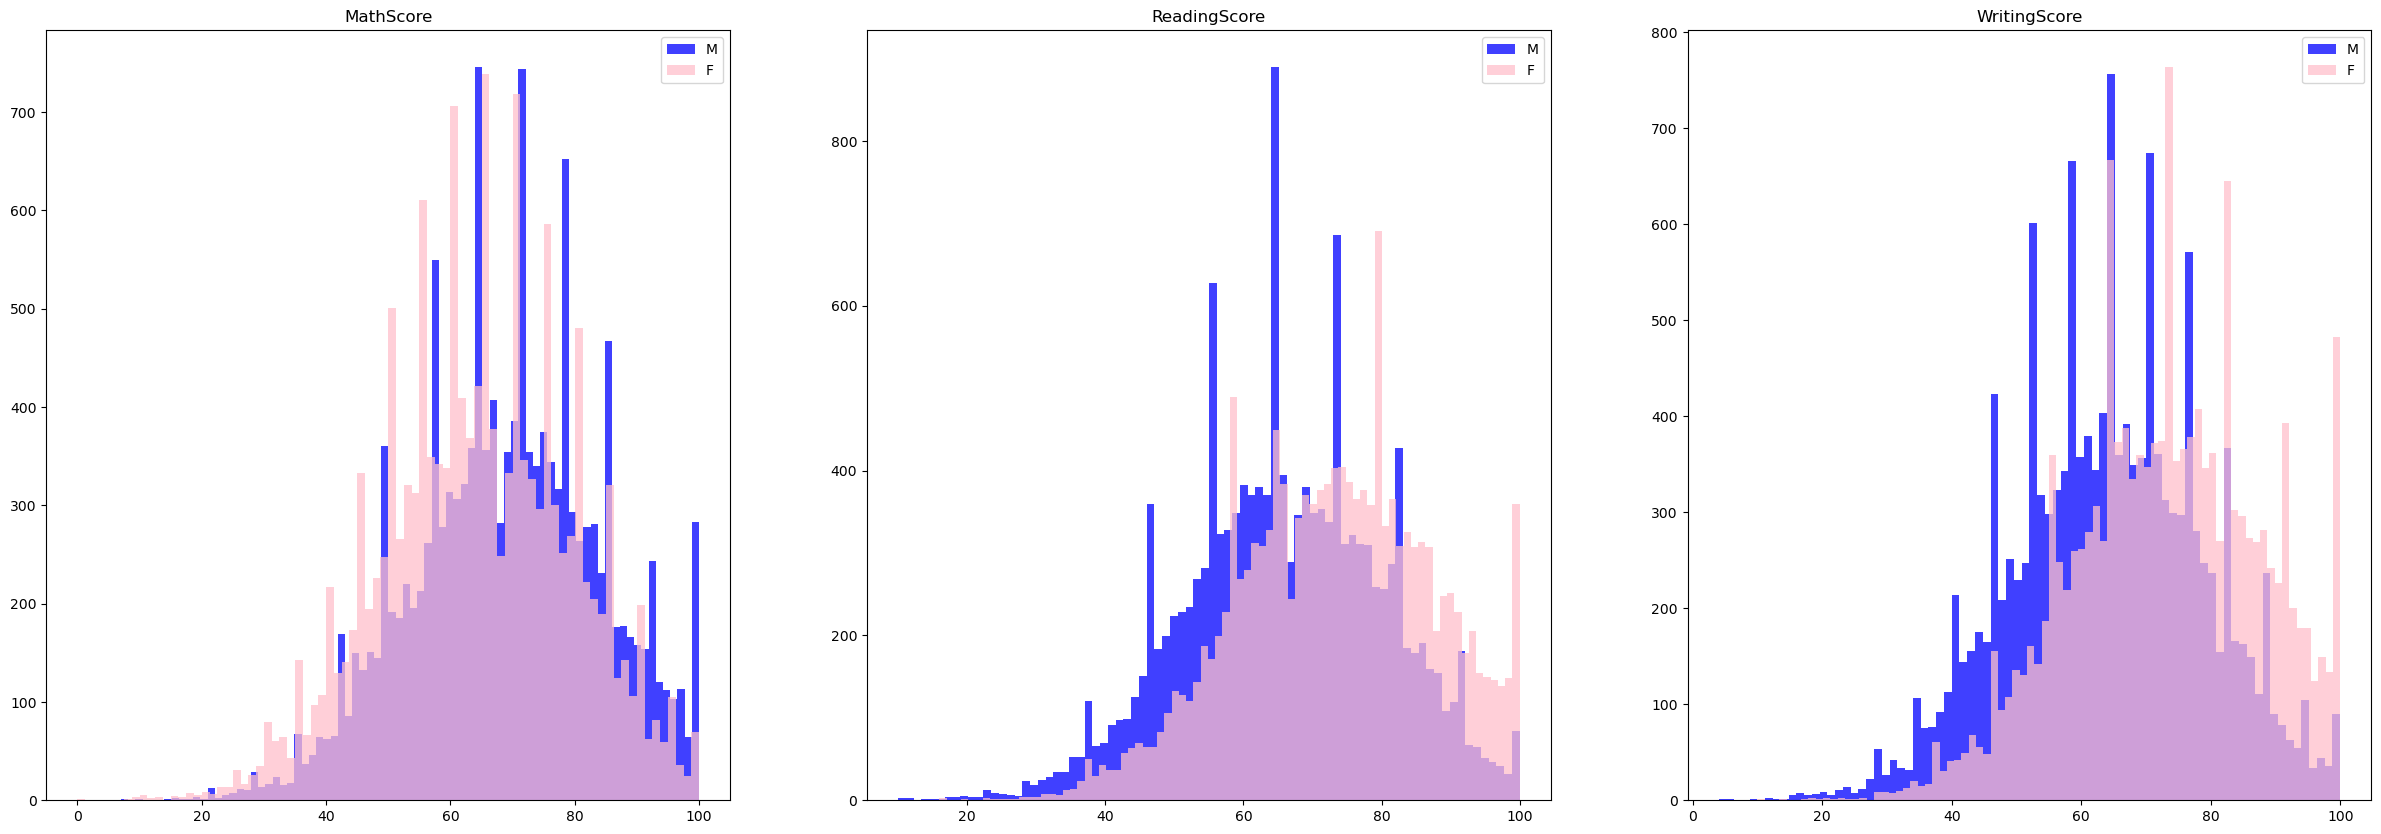

In [8]:
scores = ["MathScore", "ReadingScore", "WritingScore"]

def is_Gauss(subset, name):
    # funkcija koja ispisuje je li distribucija normalna
    _, pm = shapiro(subset)
    if pm > 0.05:
        print(f'{name} is probably a Gaussian distribution (p = {pm}).')
    else:
        print(f'{name} is probably NOT a Gaussian distribution (p = {pm}.')
    return

fig, plots = plt.subplots(1, 3, figsize=(30,10)) 

for i, diagram in enumerate(plots):
    # za svaki rezultat ispisuje se dijagram i odgovarajući opisi distribucija
    male = male.sort_values(scores[i])
    female = female.sort_values(scores[i])
    diagram.hist(male[scores[i]], bins = 80, alpha = 0.75, color = "b", zorder = 0, label="M")
    diagram.hist(female[scores[i]], bins = 80, alpha = 0.75, color = "pink", zorder = 1, label="F")
    diagram.set_title(scores[i])
    is_Gauss(male_sample[scores[i]], f"{scores[i]} among males")
    is_Gauss(female_sample[scores[i]], f"{scores[i]} among females")
    diagram.legend()

plt.show()